In [3]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
# 📥 Step 2: Load Dataset
df = pd.read_csv('Iris.csv')  # Make sure Iris.csv is in your working directory
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# 🔍 Step 3: Data Overview
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nClass Distribution:")
print(df['Species'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


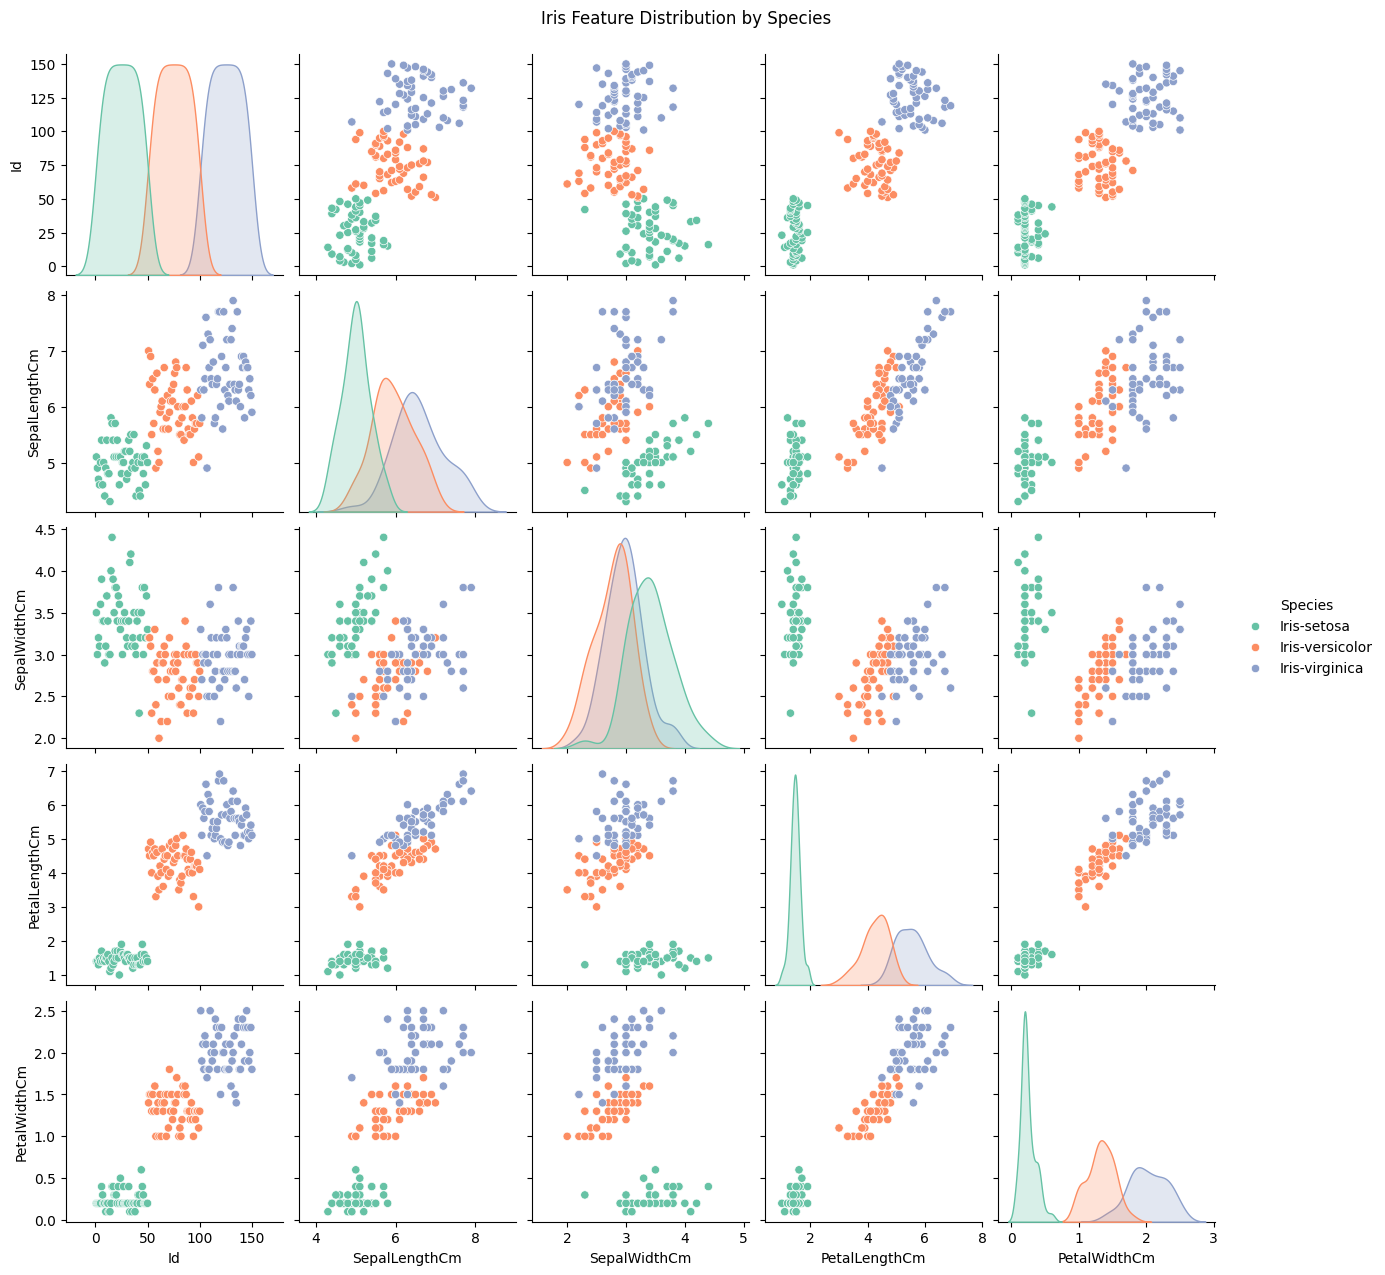

In [6]:
# 📊 Step 4: Data Visualization - Pairplot
sns.pairplot(df, hue='Species', palette='Set2')
plt.suptitle("Iris Feature Distribution by Species", y=1.02)
plt.show()


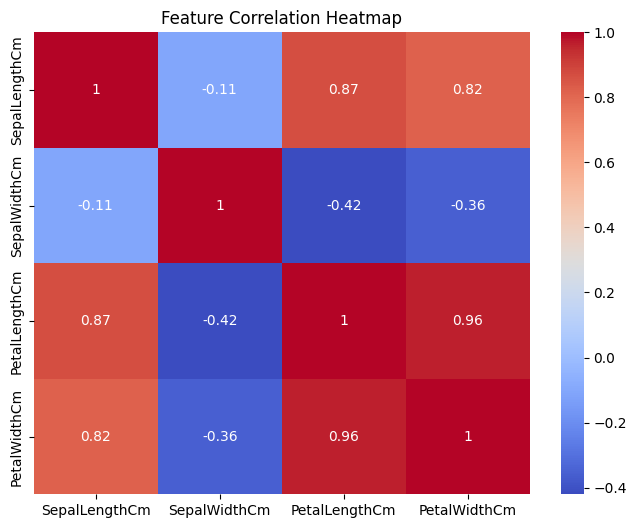

In [8]:
# 📉 Step 5: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(['Id', 'Species'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



In [9]:
# 🧹 Step 6: Preprocessing
df.drop('Id', axis=1, inplace=True)  # Remove non-informative column

# Encode species as numbers: setosa → 0, versicolor → 1, virginica → 2
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']


In [10]:
# 🧪 Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 🧠 Step 8: Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


✅ Model Accuracy: 1.0

📃 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



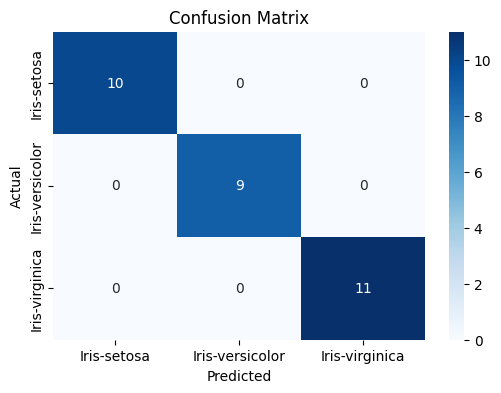

In [13]:
# 🧾 Step 9: Model Evaluation
y_pred = model.predict(X_test)

print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📃 Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
# 📌 Step 10: Prediction Example (Optional)
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
prediction = model.predict(sample)
print("🌸 Predicted class for sample [5.1, 3.5, 1.4, 0.2]:", encoder.inverse_transform(prediction)[0])

🌸 Predicted class for sample [5.1, 3.5, 1.4, 0.2]: Iris-setosa
